In [1]:
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Add,Input,Activation,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization,ZeroPadding2D
from keras.callbacks import ModelCheckpoint,EarlyStopping
from keras.models import load_model,Model
import matplotlib.pyplot as plt


C:\Users\Sana\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sana\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sana\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sana\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (

In [2]:
train_dataAugmentation =  ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, brightness_range = (0.5,0.9), zoom_range = [0.8,1.2], horizontal_flip = True, vertical_flip = True, rescale = 1./255, fill_mode = 'nearest')

test_dataAugmentation = ImageDataGenerator(height_shift_range = 0.1, vertical_flip = True,rescale = 1./255)

validation_dataAugmentation = ImageDataGenerator(width_shift_range = 0.1,horizontal_flip = True, rescale =(1./255))

train_data_generator = train_dataAugmentation.flow_from_directory('G:/data/deep learning/data/train', target_size=(200,200), color_mode = 'rgb', batch_size = 32, class_mode = 'categorical', shuffle = True)
test_data_generator = test_dataAugmentation.flow_from_directory('G:/data/deep learning/data/test', target_size=(200,200), color_mode = 'rgb', batch_size = 50, class_mode = 'categorical', shuffle = True)
validation_data_generator = validation_dataAugmentation.flow_from_directory('G:/data/deep learning/data/validation', target_size=(200,200), color_mode = 'rgb', batch_size = 50, class_mode = 'categorical', shuffle = True)


Found 2720 images belonging to 8 classes.
Found 640 images belonging to 8 classes.
Found 640 images belonging to 8 classes.


In [3]:
train_data_generator.class_indices

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

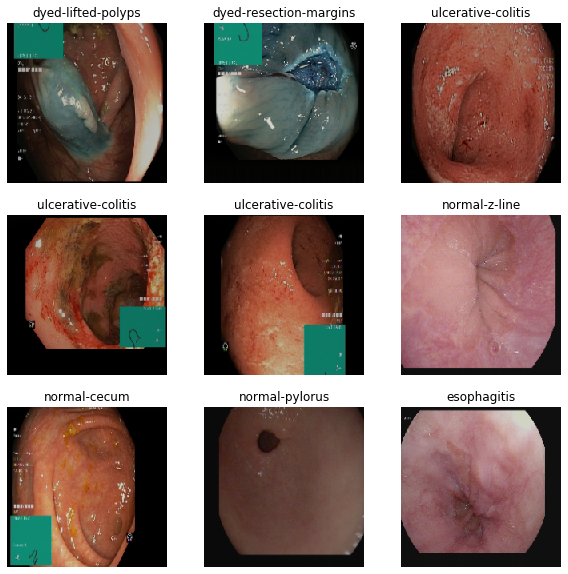

In [4]:
class_indices ={0:"dyed-lifted-polyps",1:"dyed-resection-margins",2:"esophagitis",3:"normal-cecum",4:"normal-pylorus",5:"normal-z-line",6:"polyps",7:"ulcerative-colitis"}

plt.figure(figsize=(10, 10))
for X_batch, y_batch in train_data_generator:
  for i in range(9):
    image=X_batch[i]
    ax = plt.subplot(3,3, i + 1)
    plt.imshow(image)
    plt.title(class_indices[list(y_batch[i]).index(1.0)])
    plt.axis("off")
  break

In [10]:
def conv_layer(X, filters, f,n):
    
    X = Conv2D(filters, (f,f), strides = (1,1), padding = 'same', name = 'con'+n)(X) 
    X = BatchNormalization(axis = 3, name = 'bn'+n)(X)
    X = Activation('relu')(X)
    X = MaxPooling2D(pool_size=(2,2))(X)
    
    return X

In [11]:
def main_model(input_shape = (200,200,3), classes = 8):
    
    X_input = Input(input_shape)
    
    X = conv_layer(X_input, 32, 3,'1')
    X = conv_layer(X, 64, 3,'2')
    X = conv_layer(X, 64, 3, '3')
    X = conv_layer(X, 128, 3, '4')
    X = conv_layer(X, 128, 3, '5')
    X = conv_layer(X, 256, 3, '6')
    
    X = Flatten()(X)
    X = Dropout(0.2)(X)
    X = Dense(1024, activation = 'relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(512, activation = 'relu')(X)
    X = Dropout(0.2)(X)
    X = Dense(classes, activation = 'softmax')(X)
    
    model = Model(inputs = X_input, outputs = X, name='main_model')
    
    return model

In [12]:
model = main_model(input_shape = (200,200,3), classes = 8 )

In [13]:
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [14]:
history = model.fit_generator ( train_data_generator, epochs = 20)


Epoch 1/20
 3/85 [>.............................] - ETA: 10:10 - loss: 7.0674 - accuracy: 0.1562

KeyboardInterrupt: 

In [12]:
preds = model.evaluate(test_data_generator)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

13/13 [==============================] - 51s 4s/step
Loss = 1.1898324489593506
Test Accuracy = 0.6499999761581421


In [14]:
preds = model.evaluate(validation_data_generator)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

13/13 [==============================] - 51s 4s/step
Loss = 0.7958435416221619
Test Accuracy = 0.6468750238418579
